# Notebook για κώδικα σχεδίασης στοιχειωδών σχημάτων 1
#### Αρχείο Jupyter notebook

In [1]:
import numpy as np 
from PIL import Image
from matplotlib import pyplot as plt 


In [2]:
framebuffer = np.zeros([100, 100])
print(framebuffer)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


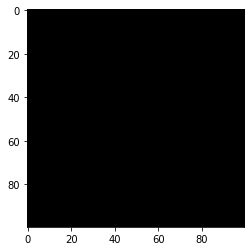

In [3]:
plt.imshow(framebuffer, cmap='gray')
plt.show()

In [4]:
# Δημιουργία συνάρτησης "setpixel"
def setpixel(x, y, colour, img):
    # Αυτή η συνάρτηση 'βάφει' το pixel στις συντεταγμένες (x,y) με το χρώμα 'colour'. 
    # To 'colour' πρέπει να είναι κάποιος ακέραιος στο 0..255 .
    # img είναι ο πίνακας που αντιστοιχεί στην ψηφιογραφική εικόνα (raster image) που θέλουμε να επεξεργαστούμε.
    imagedimensions = img.shape
    x1 = x + imagedimensions[0] // 2
    y1 = -y + imagedimensions[1] // 2
    if(y1 < 0 or y1 >= imagedimensions[0]):
        return(img)
    if(x1 < 0 or x1 >= imagedimensions[1]):
        return(img)
    img[y1, x1] = colour
    return(img)


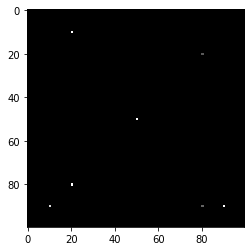

In [5]:
framebuffer = np.zeros([100, 100])
framebuffer = setpixel(0, 0, 255, framebuffer)
framebuffer = setpixel(+40, -40, 255, framebuffer)
framebuffer = setpixel(+30, -40, 100, framebuffer)
framebuffer = setpixel(+30, +30, 90, framebuffer)
framebuffer = setpixel(-40, -40, 220, framebuffer)
framebuffer = setpixel(-30, +40, 255, framebuffer)
framebuffer = setpixel(-30, -30, 255, framebuffer)
plt.imshow(framebuffer, cmap='gray')
plt.show()

In [6]:
def draw_line_1(a, b, c, colour, framebuffer):
    epsilon = 6 / np.sqrt(a**2+b**2)
    # Σχεδίαση της ευθείας με συνάρτηση f(x) = ax + by + c
    for i in range(-framebuffer.shape[0]//2, +framebuffer.shape[0]//2):
        for j in range(-framebuffer.shape[1]//2, +framebuffer.shape[1]//2):
            value = a*i + b*j + c 
            if(np.abs(value) < epsilon):
                framebuffer = setpixel(i, j, colour, framebuffer)
    return(framebuffer)

In [7]:
def draw_circle_1(xc, yc, r, colour, framebuffer):
    epsilon = 1000.
    # Σχεδίαση του κύκλου με συνάρτηση f(x) = (x-xc)^2 + (y-yc)^2 - r^2
    for i in range(-framebuffer.shape[0]//2, +framebuffer.shape[0]//2):
        for j in range(-framebuffer.shape[1]//2, +framebuffer.shape[1]//2):
            value = (i-xc)**2 + (j-yc)**2 - r**2
            if(np.abs(value) < epsilon):
                framebuffer = setpixel(i, j, colour, framebuffer)
    return(framebuffer)

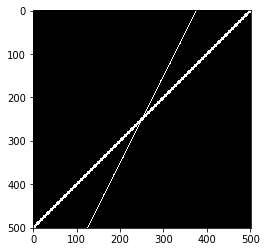

In [8]:
framebuffer = np.zeros([501, 501])
# Για a=-1, b=1, c=0, η ax + by + c = 0 γίνεται y = x
framebuffer = draw_line_1(-1, 1, 0, 255, framebuffer)
# Για a=-2, b=1, c=0, η ax + by + c = 0 γίνεται y = 2x
framebuffer = draw_line_1(-2, 1, 0, 255, framebuffer)
plt.imshow(framebuffer, cmap='gray')
plt.show()

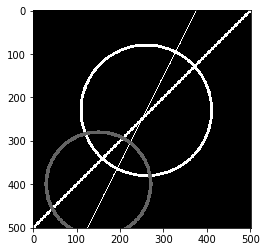

In [9]:
#framebuffer = np.zeros([100, 100])
framebuffer = draw_circle_1(10, 20, 150, 255, framebuffer)
framebuffer = draw_circle_1(-100, -150, 120, 100, framebuffer)
plt.imshow(framebuffer, cmap='gray')
plt.show()